# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Akmal Falih Rizqullah
- **Email:** m012d4ky1832@bangkit.academy
- **ID Dicoding:** akmal_falih

## Menentukan Pertanyaan Bisnis

- Bagaimana tren nilai O3 di Dingling pada tahun 2013 sampai 2017?
- Apa parameter yang memiliki pengaruh kuat terhadap suhu?
- Bagaimana komposisi udara dengan parameter SO2, NO2, CO, dan O3 pada tahun 2016?

## Import Semua Packages/Library yang Digunakan

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [160]:
dingling_df = pd.read_csv("data\PRSA_Data_Dingling_20130301-20170228.csv", delimiter=",")
dingling_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


Melakukan penggantian nama kolom PM2.5 menjadi PM2_5 agar mudah dibaca dan diolah

In [161]:
dingling_df = dingling_df.rename(columns= {
    "PM2.5":"PM2_5",
    "TEMP" :"Temperature",
    "PRES": "Pressure",
    "RAIN": "Rain",
    "wd": "Wind_Direction"
    })

### Assessing Data

#### Menilai Data Kualitas Udara Dingling

In [162]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              35064 non-null  int64  
 1   year            35064 non-null  int64  
 2   month           35064 non-null  int64  
 3   day             35064 non-null  int64  
 4   hour            35064 non-null  int64  
 5   PM2_5           34285 non-null  float64
 6   PM10            34408 non-null  float64
 7   SO2             34334 non-null  float64
 8   NO2             33830 non-null  float64
 9   CO              33052 non-null  float64
 10  O3              33850 non-null  float64
 11  Temperature     35011 non-null  float64
 12  Pressure        35014 non-null  float64
 13  DEWP            35011 non-null  float64
 14  Rain            35013 non-null  float64
 15  Wind_Direction  34924 non-null  object 
 16  WSPM            35021 non-null  float64
 17  station         35064 non-null 

Menghitung banyak missing value pada dataset

In [163]:
dingling_df.isna().sum()

No                   0
year                 0
month                0
day                  0
hour                 0
PM2_5              779
PM10               656
SO2                730
NO2               1234
CO                2012
O3                1214
Temperature         53
Pressure            50
DEWP                53
Rain                51
Wind_Direction     140
WSPM                43
station              0
dtype: int64

Menghitung banyak data yang terduplikasi

In [164]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())
dingling_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DEWP,Rain,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


### Cleaning Data

Membuat kolom baru yang berisi year, month, day, dan hour dengan tipe data date_time

In [165]:
date_time = pd.to_datetime(dingling_df[["year", "month", "day", "hour"]])
dingling_df.insert(1, "date_time", date_time)
dingling_df.set_index("date_time", inplace=True)
dingling_df

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DEWP,Rain,Wind_Direction,WSPM,station
date_time,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


Menangani Missing Value dengan metode Imputation menggunakan nilai mean tiap parameter

In [166]:
dingling_df.PM2_5.fillna(value=dingling_df.PM2_5.mean(), inplace=True)
dingling_df.PM10.fillna(value=dingling_df.PM10.mean(), inplace=True)
dingling_df.SO2.fillna(value=dingling_df.SO2.mean(), inplace=True)
dingling_df.NO2.fillna(value=dingling_df.NO2.mean(), inplace=True)
dingling_df.CO.fillna(value=dingling_df.CO.mean(), inplace=True)
dingling_df.O3.fillna(value=dingling_df.O3.mean(), inplace=True)
dingling_df.Temperature.fillna(value=dingling_df.Temperature.mean(), inplace=True)
dingling_df.Pressure.fillna(value=dingling_df.Pressure.mean(), inplace=True)
dingling_df.DEWP.fillna(value=dingling_df.DEWP.mean(), inplace=True)
dingling_df.Rain.fillna(value=dingling_df.Rain.mean(), inplace=True)
dingling_df.WSPM.fillna(value=dingling_df.WSPM.mean(), inplace=True)


Karena parameter WD merupakan data kategorikal, missing value diisi dengan nilai terbanyak yang muncul pada data

In [167]:
dingling_df.Wind_Direction.value_counts()

NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: Wind_Direction, dtype: int64

In [168]:
dingling_df.Wind_Direction.fillna(value="NNW", inplace=True)

In [169]:
dingling_df.isna().sum()

No                0
year              0
month             0
day               0
hour              0
PM2_5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
Temperature       0
Pressure          0
DEWP              0
Rain              0
Wind_Direction    0
WSPM              0
station           0
dtype: int64

Sudah tidak terdapat fitur dengan missing value pada data

## Exploratory Data Analysis (EDA)

### Explore Air Quality Data in Dingling

In [170]:
dingling_df.head()

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DEWP,Rain,Wind_Direction,WSPM,station
date_time,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,27.585467,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,27.585467,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,27.585467,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,27.585467,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


Melakukan grouping berdasarkan fitur 'year' dengan memunculkan nilai mean tiap parameter

In [171]:
# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata untuk setiap kolom
grouped_data = dingling_df.groupby(by="year").agg({
    "PM2_5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean",
    "Temperature": "mean",
    "Pressure": "mean",
    "DEWP": "mean",
    "Rain": "mean",
    "WSPM": "mean"
})
grouped_data

,PM2_5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DEWP,Rain,WSPM
year,,,,,,,,,,,
2013,64.777450,78.763031,14.032211,29.890448,852.777553,65.187935,15.961397,1004.957489,4.471882,0.066068,1.647685
2014,73.949575,90.358112,14.458873,27.362325,877.656411,72.515434,14.172511,1008.153664,1.037260,0.037888,1.868642
2015,64.627529,85.350134,11.351143,26.881813,966.453378,70.953036,13.611578,1007.850727,1.844610,0.082552,1.839283
2016,60.042212,80.514580,7.294931,25.486036,874.441321,67.357060,13.491736,1007.920728,1.646874,0.065326,1.982806
2017,68.350216,78.650888,13.250526,34.387971,1151.824317,53.948925,0.543273,1018.308218,-13.957718,0.001839,2.121415


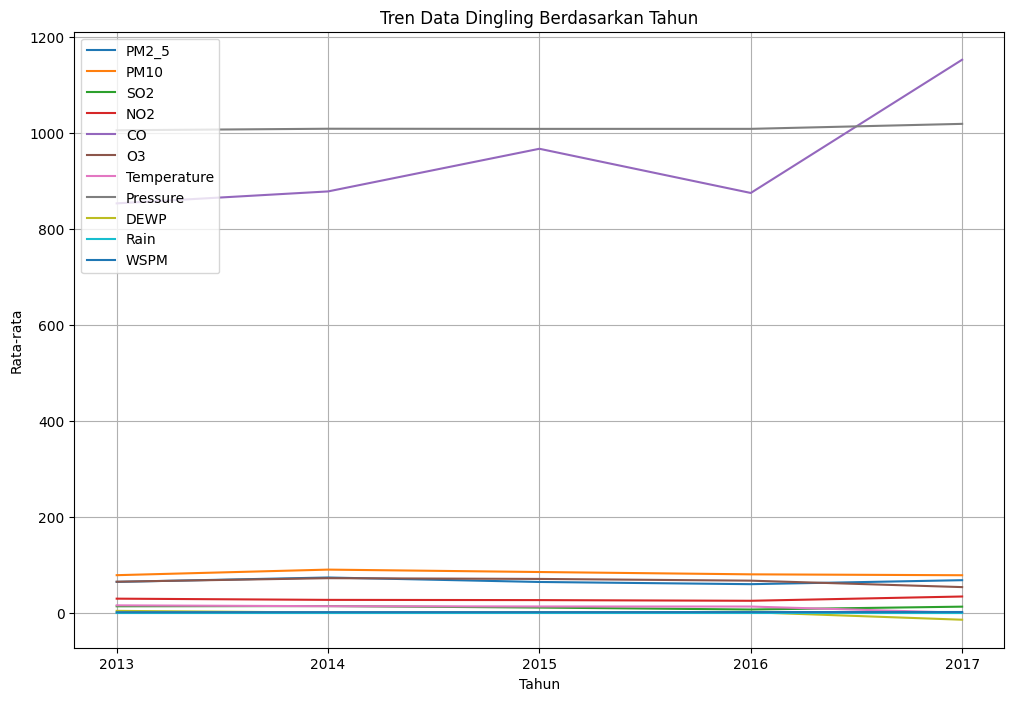

In [172]:
# Menampilkan tren untuk setiap kolom
plt.figure(figsize=(12, 8))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)

plt.title('Tren Data Dingling Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata')
plt.legend(loc='upper left')
plt.grid(True)

years = grouped_data.index.astype(int)
plt.xticks(years)

plt.show()

Menampilkan histogram tiap parameter kualitas udara di Dingling

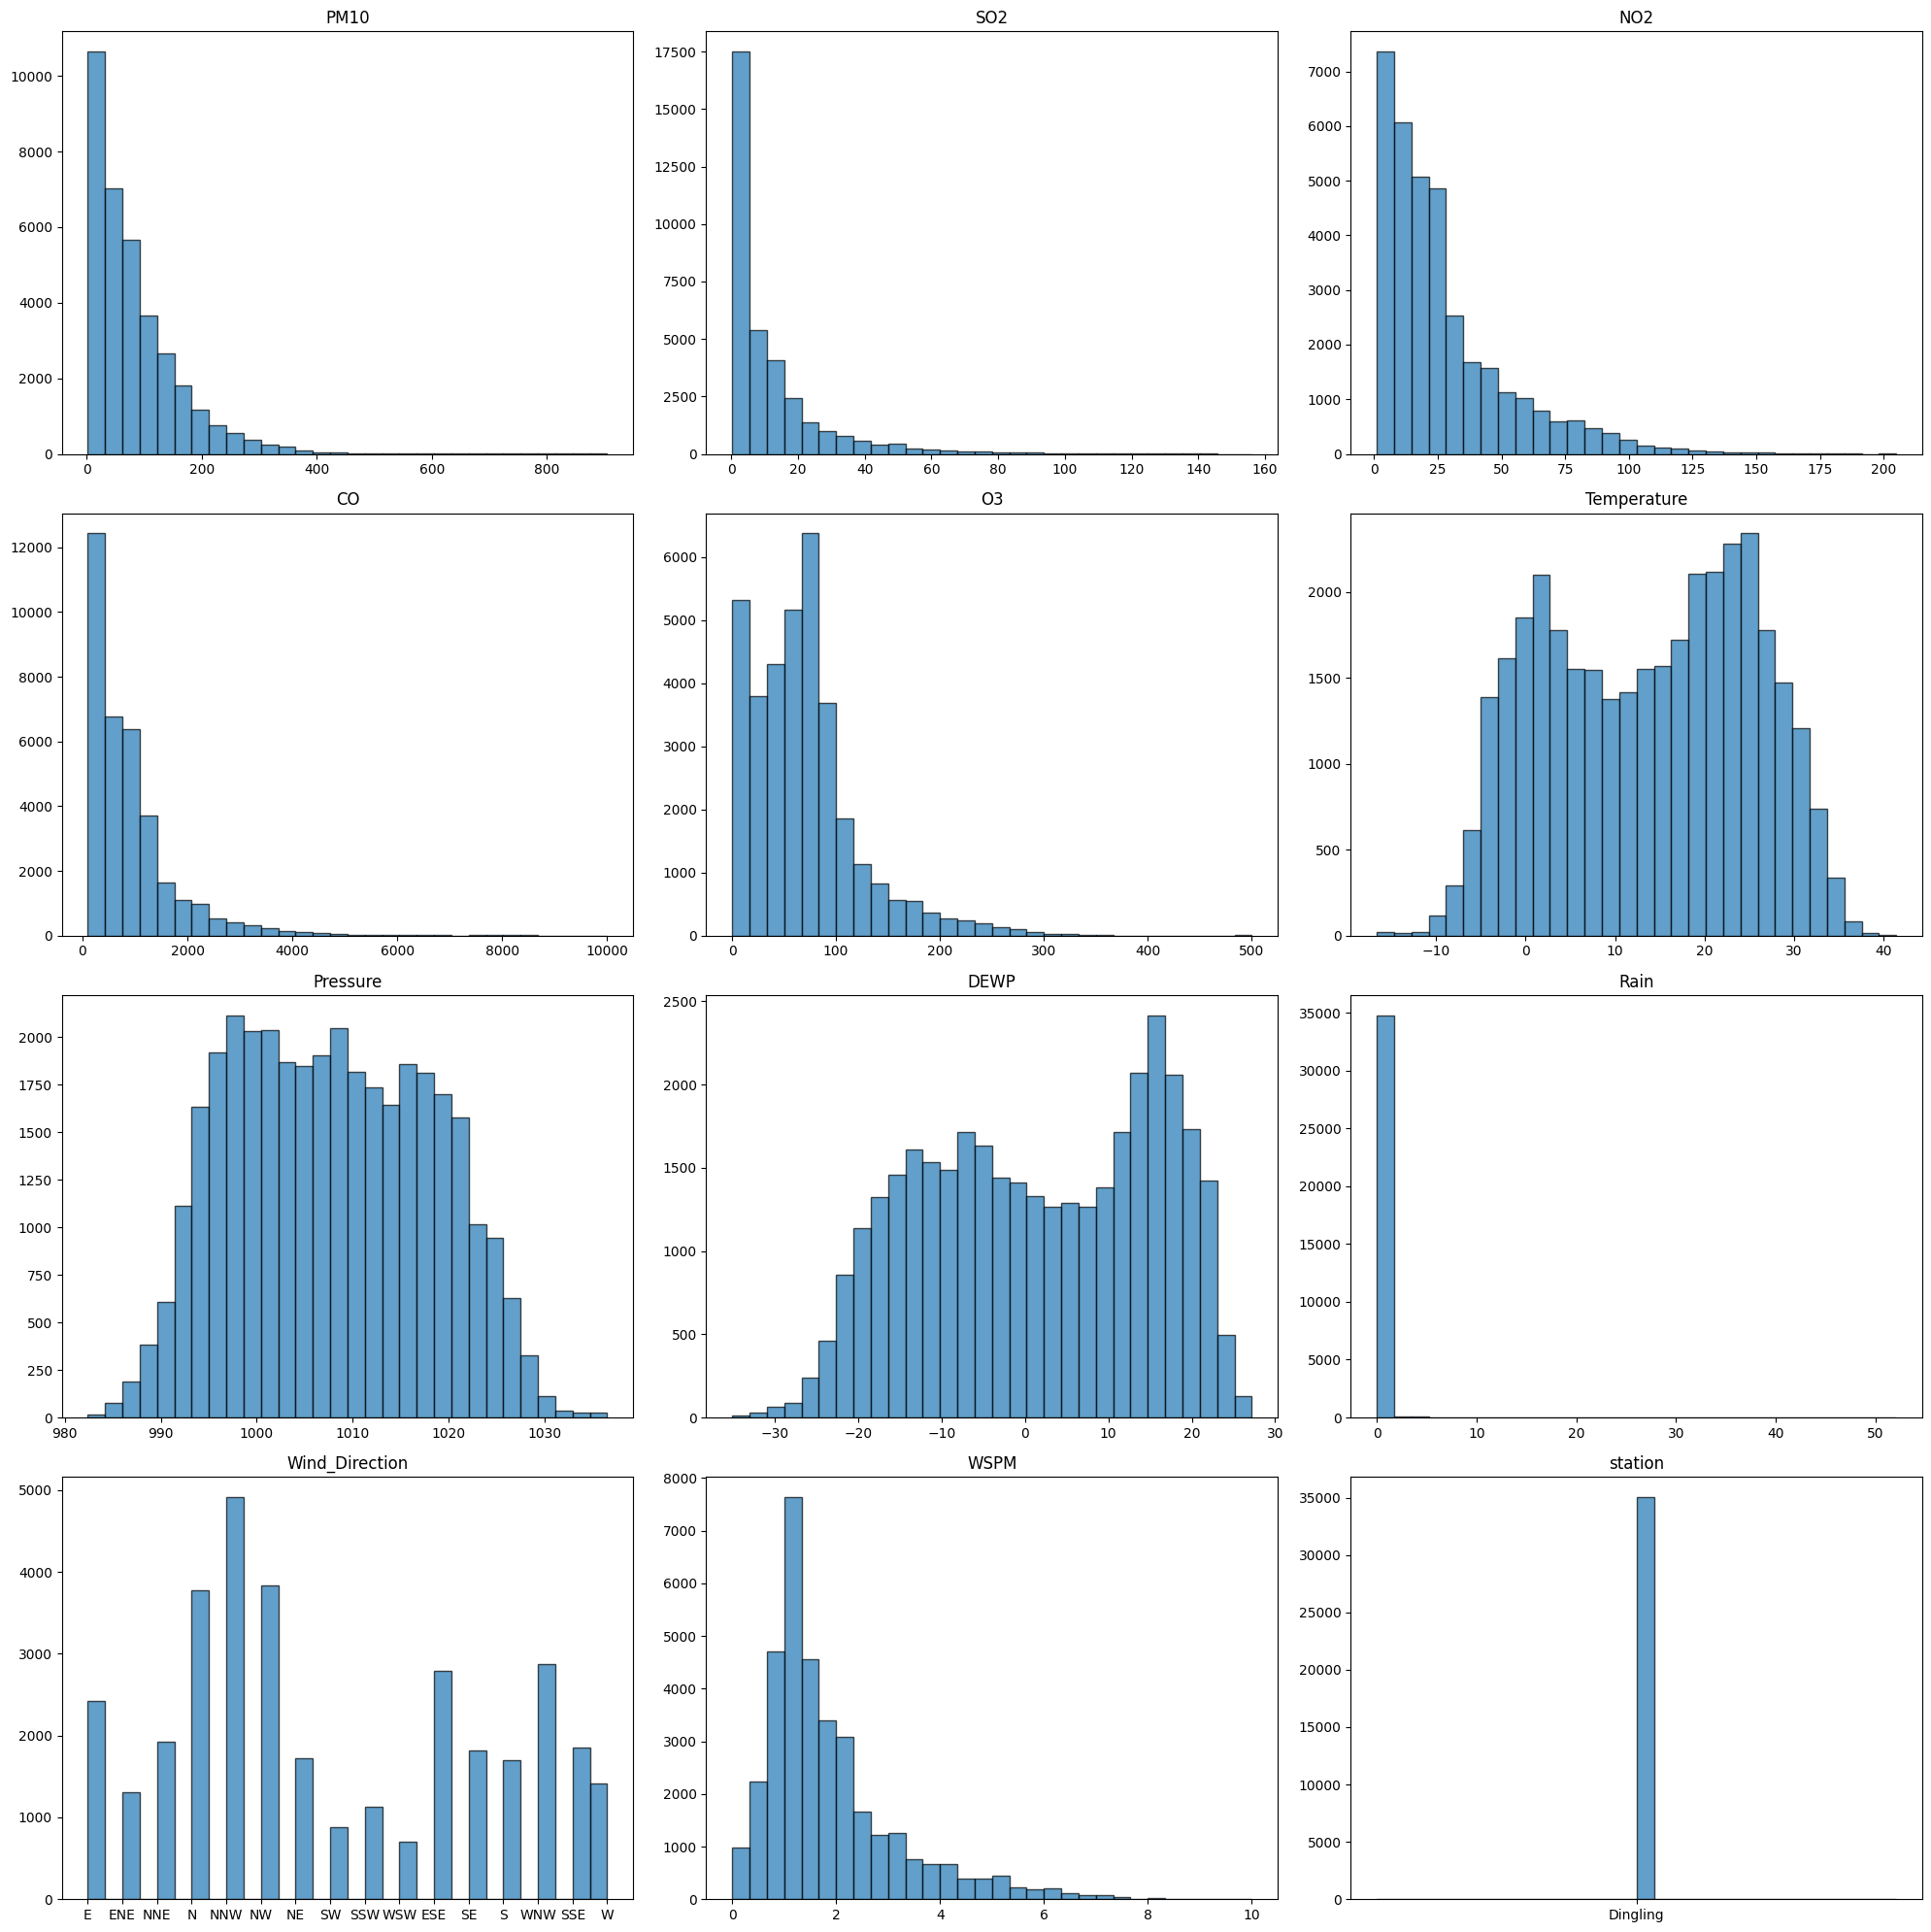

In [173]:

fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, ax in enumerate(axs.flatten()):
    if i < len(dingling_df.columns):
        ax.hist(dingling_df.iloc[:, i+6].dropna(), bins=30, edgecolor='black', alpha=0.7)
        ax.set_title(dingling_df.columns[i+6])
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan nilai O3 di Dingling pada tahun 2013 sampai 2017?

Melakukan grouping nilai O3 berdasarkan tahun dengan menampilkan nilai minimum, maximum, dan mean

In [174]:
dingling_df.groupby(by="year").agg({
    "O3":["min", "max", "mean"]
})

O3                  
         min    max       mean
year                          
2013  0.2142  382.0  65.187935
2014  1.0000  411.0  72.515434
2015  2.0000  432.0  70.953036
2016  2.0000  500.0  67.357060
2017  1.0000  104.0  53.948925

In [175]:
grouped_data = dingling_df.groupby(by="year").agg({
    "O3": "mean"
})

grouped_data['perubahan_O3'] = grouped_data['O3'].diff()
print(grouped_data[['perubahan_O3']])

      perubahan_O3
year              
2013           NaN
2014      7.327499
2015     -1.562398
2016     -3.595976
2017    -13.408135


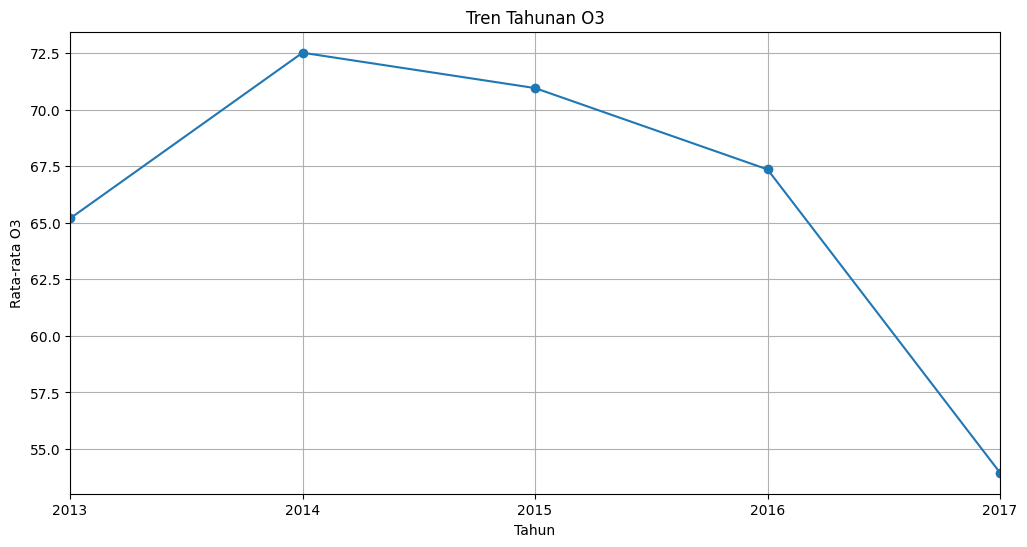

In [176]:
# Resampling data tahunan untuk variabel 'O3'
yearly_data = dingling_df['O3'].resample('Y').mean()

# Visualisasi tren tahunan 'O3'
plt.figure(figsize=(12, 6))
yearly_data.plot(title='Tren Tahunan O3', marker='o')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata O3')
plt.grid(True)
plt.show()

- Berdasarkan grafik, nilai rata-rata O3 sepanjang tahun paling tinggi berada pada tahun 2014 dengan nilai 72.515434
- Setelah tahun 2014, nilai rata-rata O3 sepanjang tahun mengalami penurunan
- Terjadi penurunan nilai nilai rata-rata O3 sepanjang tahun yang signifikan dari tahun 2016 ke 2017, yakni dari nilai 67.357060 ke 53.948925

### Pertanyaan 2: Apa parameter yang memiliki pengaruh paling kuat terhadap suhu?

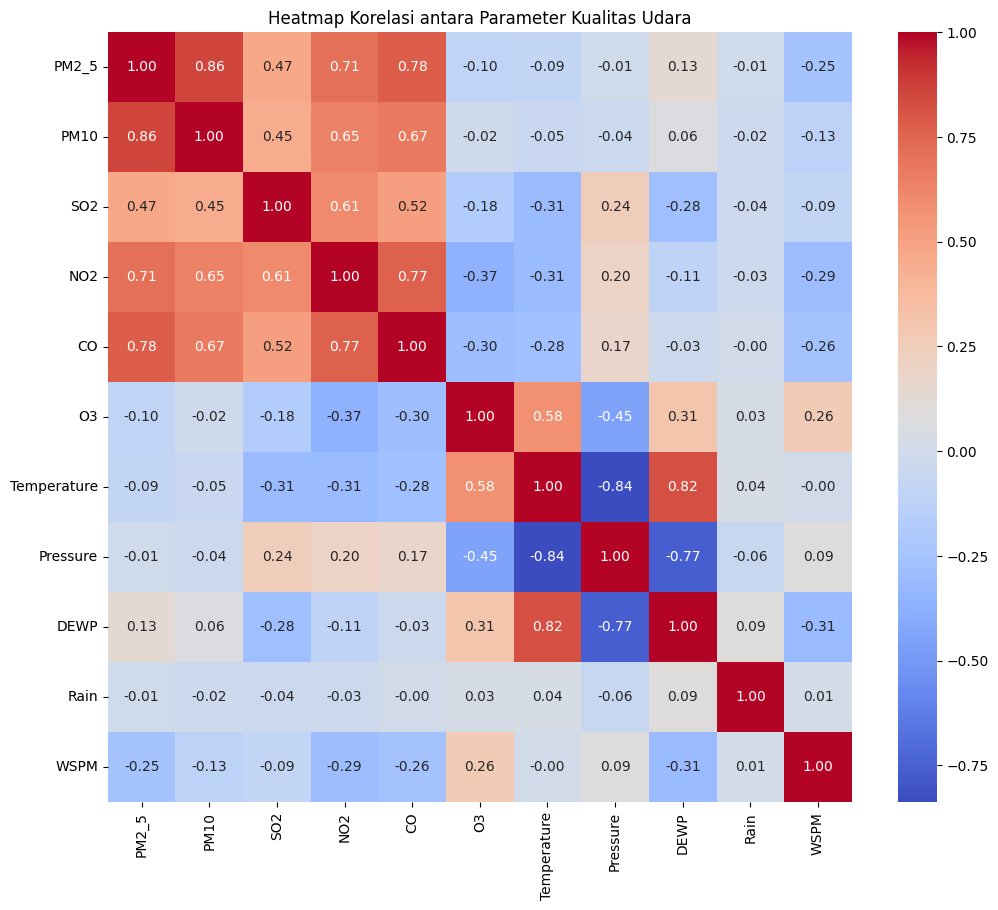

In [177]:
corr_matrix = dingling_df.drop(columns=["No", "year", "month", "day", "hour"]).corr(numeric_only=True)


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Parameter Kualitas Udara')
plt.show()

In [178]:
correlations = dingling_df.drop(columns=["No", "year", "month", "day", "hour", "Temperature"]).corrwith(dingling_df['Temperature'], numeric_only=True)

most_correlated_feature_pos = correlations[correlations.idxmax()]

print(f"Parameter dengan korelasi positif yang paling kuat terhadap suhu adalah {correlations.idxmax()} dengan {most_correlated_feature_pos}")


Parameter dengan korelasi positif yang paling kuat terhadap suhu adalah DEWP dengan 0.823683914367152


In [179]:
most_correlated_feature = correlations[correlations.abs().idxmax()]

print(f"Parameter dengan korelasi negatif yang paling kuat terhadap suhu adalah {correlations.abs().idxmax()} dengan {most_correlated_feature}")


Parameter dengan korelasi negatif yang paling kuat terhadap suhu adalah Pressure dengan -0.8377636522753331


### Pertanyaan 3: Bagaimana komposisi udara dengan parameter SO2, NO2, CO, dan O3 pada tahun 2016?

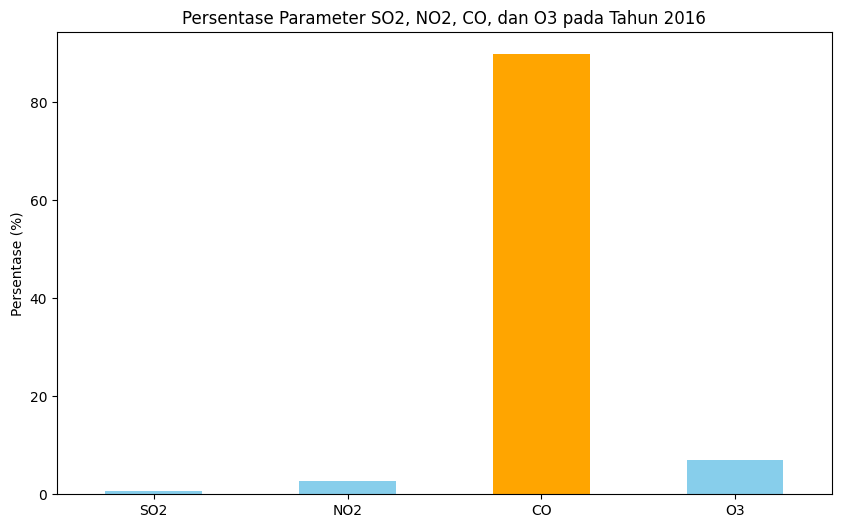

In [180]:
# Filter data untuk tahun 2016
data_2016 = dingling_df[dingling_df['year'] == 2016]

# Hitung rata-rata nilai parameter SO2, NO2, CO, dan O3
mean_values = data_2016[['SO2', 'NO2', 'CO', 'O3']].mean()

# Hitung persentase masing-masing parameter
total_mean = mean_values.sum()
percentages = (mean_values / total_mean) * 100

# Menentukan warna bar berdasarkan nilai tertinggi
colors = ['skyblue' if val != percentages.max() else 'orange' for val in percentages]

# Menyajikan data dalam diagram
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', color=colors)
plt.title('Persentase Parameter SO2, NO2, CO, dan O3 pada Tahun 2016')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=0)
plt.show()

In [181]:
percentages

SO2     0.748521
NO2     2.615081
CO     89.725000
O3      6.911398
dtype: float64

In [182]:
print(f"Persentase komposisi udara pada tahun 2016 terbesar adalah {percentages.idxmax()} dengan nilai {percentages.max()}%")

Persentase komposisi udara pada tahun 2016 terbesar adalah CO dengan nilai 89.72500014381498%


## Conclusion

Conclution pertanyaan 1: Bagaimana tren nilai O3 di Dingling pada tahun 2013 sampai 2017?
- Terjadi kenaikan nilai rata-rata O3 pada tahun 2013-2014 sebesar 7.327499. Kemudian, nilai rata-rata O3 mengalami penurunan hingga tahun 2017 di angka 53.948925

Conclution pertanyaan 2: Apa parameter yang memiliki pengaruh kuat terhadap suhu?
- Parameter yang memiliki pengaruh positif paling kuat adalah DEWP. Sedangkan, parameter yang memiliki pengaruh negatif paling kuat adalah PRES

Conclution pertanyaan 3: Bagaimana komposisi udara dengan parameter SO2, NO2, CO, dan O3 pada tahun 2016?
- Persentase komposisi udara pada tahun 2016 adalah SO2: 0.748521%, NO2: 2.615081%, CO: 89.725000%, dan O3: 6.911398%. Sehingga, unsur yang mendominasi komposisi udara pada tahun 2016 adalah CO.


## Mengekspor data kualitas udara setelah proses Data Wrangling

In [183]:
dingling_df.to_csv("dashboard/data_dingling.csv", index=False)